In [1]:
!nvidia-smi

Sun Sep  8 16:30:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.13                 Driver Version: 556.13         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P3             15W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os

train_images = './train/images'
train_labels = './train/labels'
valid_images = './valid/images'
valid_labels = './valid/labels'
test_images = './test/images'
test_labels = './test/labels'

training_images = len([f for f in os.listdir(train_images) if os.path.isfile(os.path.join(train_images, f))])
validation_images = len([f for f in os.listdir(valid_images) if os.path.isfile(os.path.join(valid_images, f))])
testing_images = len([f for f in os.listdir(test_images) if os.path.isfile(os.path.join(test_images, f))])

print(f'There are {training_images} images for training.')
print(f'There are {validation_images} images for validation.')
print(f'There are {testing_images} images for testing.')

There are 725 images for training.
There are 155 images for validation.
There are 150 images for testing.


In [3]:
!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.90  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (12 CPUs, 7.3 GB RAM, 399.5/475.7 GB disk)


In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

100%|██████████| 6.25M/6.25M [00:07<00:00, 931kB/s] 


In [5]:
# Train the model
results = model.train(data="data.yaml", epochs=100, patience=10, imgsz=640, workers=4, batch=8)

Ultralytics YOLOv8.2.90  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning C:\Users\hp\Desktop\Smoking and Drinking Detection\train\labels.cache... 725 images, 3 backgrounds, 0 corrupt: 100%|██████████| 725/725 [00:00<?, ?it/s]
val: Scanning C:\Users\hp\Desktop\Smoking and Drinking Detection\valid\labels.cache... 155 images, 1 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.3G      1.238      2.577      1.395         14        640: 100%|██████████| 91/91 [00:17<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        155        216      0.624      0.289      0.305      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.37G      1.332      2.281       1.43         13        640: 100%|██████████| 91/91 [00:12<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.58it/s]

                   all        155        216      0.385      0.414      0.263      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.36G      1.479       2.29      1.551         16        640: 100%|██████████| 91/91 [00:12<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        155        216      0.407      0.403      0.371      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.37G      1.475      2.119      1.557         16        640: 100%|██████████| 91/91 [00:12<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]

                   all        155        216      0.438      0.369      0.323      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.36G      1.415      1.798      1.493         14        640: 100%|██████████| 91/91 [00:12<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.17it/s]

                   all        155        216      0.612      0.328      0.412      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.35G      1.422      1.797      1.524         10        640: 100%|██████████| 91/91 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]

                   all        155        216       0.36      0.518      0.349      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.37G      1.401      1.765        1.5         18        640: 100%|██████████| 91/91 [00:12<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]

                   all        155        216      0.597      0.384      0.382      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.36G      1.482      1.854      1.544         10        640: 100%|██████████| 91/91 [00:12<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]

                   all        155        216      0.884      0.347      0.477      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.36G      1.352      1.681      1.478         15        640: 100%|██████████| 91/91 [00:11<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]

                   all        155        216      0.595      0.484      0.481      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.36G      1.348      1.609      1.458         10        640: 100%|██████████| 91/91 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.89it/s]

                   all        155        216      0.574      0.517      0.535      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.36G      1.282      1.507      1.413         13        640: 100%|██████████| 91/91 [00:12<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

                   all        155        216      0.525      0.559      0.533      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.37G       1.27      1.534      1.414         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        155        216      0.548      0.535      0.544      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.36G      1.277      1.435      1.399          7        640: 100%|██████████| 91/91 [00:11<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.13it/s]

                   all        155        216      0.791       0.52      0.614      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.35G      1.249      1.402       1.38         14        640: 100%|██████████| 91/91 [00:11<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        155        216      0.652      0.542      0.588      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.37G       1.21      1.363      1.366          9        640: 100%|██████████| 91/91 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.48it/s]

                   all        155        216      0.726       0.58      0.637      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.36G      1.182      1.291      1.356         16        640: 100%|██████████| 91/91 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]

                   all        155        216      0.554      0.599      0.615      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.36G      1.232      1.357      1.395         11        640: 100%|██████████| 91/91 [00:12<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.03it/s]

                   all        155        216      0.588      0.538      0.531      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.36G      1.247      1.362      1.378          8        640: 100%|██████████| 91/91 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]

                   all        155        216      0.623      0.569      0.555      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.36G      1.189      1.314      1.346         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

                   all        155        216      0.679      0.582      0.621      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.37G      1.148       1.24      1.309         16        640: 100%|██████████| 91/91 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.91it/s]

                   all        155        216       0.65      0.621      0.642      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.36G      1.133      1.181      1.323          7        640: 100%|██████████| 91/91 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

                   all        155        216      0.755      0.597      0.665       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.35G      1.131       1.17      1.304         16        640: 100%|██████████| 91/91 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]

                   all        155        216      0.715      0.627       0.64      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.37G      1.123      1.201      1.297         19        640: 100%|██████████| 91/91 [00:11<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]

                   all        155        216      0.707      0.619      0.656      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.36G      1.156        1.2      1.295         10        640: 100%|██████████| 91/91 [00:12<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]

                   all        155        216      0.672       0.62      0.641      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.36G      1.109       1.16      1.299         11        640: 100%|██████████| 91/91 [00:13<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.22it/s]

                   all        155        216      0.663      0.646      0.628      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.36G      1.087       1.09      1.271         12        640: 100%|██████████| 91/91 [00:12<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.98it/s]

                   all        155        216       0.67      0.655      0.667      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.36G      1.068      1.108      1.258          9        640: 100%|██████████| 91/91 [00:12<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]

                   all        155        216      0.666      0.628      0.645      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.37G      1.077      1.086      1.271         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]

                   all        155        216      0.654      0.654      0.678      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.36G      1.001      1.055      1.235         13        640: 100%|██████████| 91/91 [00:11<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.15it/s]

                   all        155        216      0.701      0.649      0.672      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.35G      1.046      1.054      1.246          5        640: 100%|██████████| 91/91 [00:12<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.02it/s]

                   all        155        216      0.754      0.653      0.687      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.36G      1.038      1.071      1.245         18        640: 100%|██████████| 91/91 [00:12<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        155        216      0.766      0.623      0.682       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.36G      1.053      1.017      1.241         15        640: 100%|██████████| 91/91 [00:12<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.30it/s]

                   all        155        216      0.681      0.686      0.715      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.36G      0.997     0.9822      1.229         13        640: 100%|██████████| 91/91 [00:12<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.30it/s]

                   all        155        216      0.759      0.691      0.707       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.36G      1.016      1.034      1.219          8        640: 100%|██████████| 91/91 [00:13<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        155        216       0.71      0.686      0.716      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.36G     0.9917      1.006      1.198         12        640: 100%|██████████| 91/91 [00:12<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]

                   all        155        216      0.746      0.646      0.702      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.37G      0.984     0.9994      1.196         10        640: 100%|██████████| 91/91 [00:12<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.40it/s]

                   all        155        216      0.764      0.689      0.741      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.36G     0.9555     0.9504       1.19          5        640: 100%|██████████| 91/91 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.44it/s]

                   all        155        216      0.809       0.66      0.742      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.35G     0.9339     0.8894      1.174         17        640: 100%|██████████| 91/91 [00:12<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        155        216      0.786      0.696      0.731      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.37G     0.9619     0.9325       1.21         10        640: 100%|██████████| 91/91 [00:14<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]

                   all        155        216      0.796      0.658      0.704      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.36G     0.9711     0.9157      1.196          6        640: 100%|██████████| 91/91 [00:12<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        155        216      0.703      0.701      0.721       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.36G     0.9595     0.8999      1.179         10        640: 100%|██████████| 91/91 [00:12<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]

                   all        155        216      0.742      0.729      0.731        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.36G     0.9251     0.8785      1.167         12        640: 100%|██████████| 91/91 [00:12<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]

                   all        155        216      0.858      0.676      0.744      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.36G     0.9345     0.8931      1.165          7        640: 100%|██████████| 91/91 [00:11<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        155        216      0.695      0.702      0.721      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.37G     0.9614      0.919      1.189         11        640: 100%|██████████| 91/91 [00:12<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]

                   all        155        216       0.76      0.674      0.718      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.36G     0.9397     0.8874      1.171         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.14it/s]


                   all        155        216      0.739      0.668      0.702      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.35G     0.9299     0.8694      1.167         20        640: 100%|██████████| 91/91 [00:11<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.33it/s]

                   all        155        216      0.788       0.66      0.709      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.37G     0.9516     0.8869      1.186         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]

                   all        155        216      0.873      0.661       0.74      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.36G     0.8959     0.8317       1.15         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]

                   all        155        216      0.765      0.703      0.749      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.36G     0.9143     0.8729      1.157          8        640: 100%|██████████| 91/91 [00:11<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]

                   all        155        216      0.837      0.675      0.747      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.36G     0.9081     0.8556      1.144         17        640: 100%|██████████| 91/91 [00:11<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all        155        216      0.716      0.712      0.731      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.36G     0.8703      0.805      1.127         12        640: 100%|██████████| 91/91 [00:11<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.03it/s]

                   all        155        216      0.862      0.629      0.719      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.37G     0.8627     0.8376      1.117         14        640: 100%|██████████| 91/91 [00:12<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.22it/s]

                   all        155        216      0.861      0.666      0.743      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.36G     0.8851     0.8166      1.147         12        640: 100%|██████████| 91/91 [00:11<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]

                   all        155        216      0.879      0.679       0.75      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.35G     0.8677     0.8154      1.123          8        640: 100%|██████████| 91/91 [00:11<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]

                   all        155        216      0.861      0.674      0.757      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.37G     0.8841     0.7957       1.13         16        640: 100%|██████████| 91/91 [00:11<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]

                   all        155        216      0.897      0.658      0.764      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.36G     0.8546     0.7644      1.141          6        640: 100%|██████████| 91/91 [00:11<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]

                   all        155        216      0.833       0.72      0.755      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.36G      0.841     0.7679      1.123         15        640: 100%|██████████| 91/91 [00:11<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.04it/s]

                   all        155        216      0.799      0.722      0.762      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.36G     0.8092     0.7308      1.107         18        640: 100%|██████████| 91/91 [00:11<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.14it/s]

                   all        155        216      0.807      0.717      0.751      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.36G     0.8423      0.746       1.11          7        640: 100%|██████████| 91/91 [00:11<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.86it/s]

                   all        155        216      0.825      0.682      0.753      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.37G     0.7797      0.735      1.083          7        640: 100%|██████████| 91/91 [00:11<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.98it/s]

                   all        155        216      0.791       0.73      0.771      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.36G     0.8252     0.7395       1.11         13        640: 100%|██████████| 91/91 [00:11<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]

                   all        155        216      0.798      0.715       0.74      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.35G     0.8048     0.7241       1.08         21        640: 100%|██████████| 91/91 [01:00<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        155        216      0.845      0.699      0.767      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.37G      0.806     0.7001      1.093         11        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        155        216      0.828       0.71      0.773      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.36G     0.8107     0.7017      1.102         11        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        155        216      0.816      0.731      0.769      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.36G     0.8302     0.7344      1.095         13        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        155        216      0.868      0.703      0.772       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.36G     0.8162     0.7144      1.084         12        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        155        216      0.818      0.749      0.783      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.36G     0.8044     0.7143      1.082          9        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        155        216      0.804      0.756      0.777      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.37G     0.7648     0.6768       1.07         11        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        155        216      0.871      0.691      0.764      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.36G     0.7803     0.6847      1.075         19        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        155        216      0.878      0.709      0.765      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.35G     0.7883     0.6662      1.077         12        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        155        216      0.804      0.747      0.778      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.37G     0.8069     0.6901      1.082         12        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        155        216      0.828      0.715      0.772      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.36G     0.7853     0.6752      1.074          6        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        155        216      0.871      0.703      0.786      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.36G     0.7643     0.6798      1.077         10        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        155        216      0.852      0.721      0.797      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.36G     0.7568     0.6641      1.069         18        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        155        216      0.902      0.707      0.788      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.36G     0.7462     0.6361      1.061         26        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        155        216       0.84      0.754      0.808       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.37G      0.771     0.6524      1.067         11        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        155        216      0.895      0.707      0.795      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.36G     0.7665     0.6251      1.061         10        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        155        216      0.861      0.724      0.797      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.35G     0.7402     0.6301      1.044         20        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        155        216      0.896      0.715      0.791      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.37G     0.7042     0.5961      1.017         11        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        155        216      0.885      0.709      0.788      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.36G     0.7048     0.6081      1.042          6        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        155        216      0.888      0.707      0.794      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.36G     0.7076     0.6067      1.033         15        640: 100%|██████████| 91/91 [00:50<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        155        216      0.825      0.742      0.791      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.36G     0.7187     0.6018      1.031         14        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        155        216      0.836      0.726      0.786      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.36G     0.6939     0.5789      1.022          9        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        155        216       0.88      0.724      0.793      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.36G     0.6811     0.5718      1.014         20        640: 100%|██████████| 91/91 [00:50<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        155        216      0.896      0.714      0.788      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.36G     0.7063     0.5869      1.027          8        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        155        216      0.892      0.712      0.796      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.35G     0.7127     0.6008      1.046         13        640: 100%|██████████| 91/91 [00:49<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        155        216       0.86      0.719      0.793      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.37G     0.6669     0.5573      1.006         10        640: 100%|██████████| 91/91 [00:49<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        155        216      0.912       0.73      0.817      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.36G     0.6939     0.5896      1.011          9        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        155        216      0.918       0.73      0.817      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.36G      0.659     0.5534      1.005          8        640: 100%|██████████| 91/91 [00:50<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        155        216      0.885      0.728      0.805      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.36G     0.6711     0.5764      1.015          5        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        155        216      0.882      0.745      0.812       0.57


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.36G     0.6702     0.5133     0.9852          8        640: 100%|██████████| 91/91 [00:51<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        155        216      0.865       0.74      0.808      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.36G     0.6573     0.5157     0.9802          5        640: 100%|██████████| 91/91 [00:49<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        155        216      0.899      0.728       0.81      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.36G     0.6595     0.4964     0.9757          7        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        155        216      0.869      0.741      0.812      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.35G     0.6418     0.4998     0.9693         10        640: 100%|██████████| 91/91 [00:49<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        155        216      0.881      0.741      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.37G     0.6174      0.464     0.9668          9        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        155        216      0.858       0.75      0.816      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.36G     0.6283      0.477     0.9432          6        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        155        216      0.876      0.752      0.818      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.36G     0.6188     0.4698     0.9597          7        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        155        216      0.892      0.745      0.821      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.36G     0.6125     0.4657     0.9483          6        640: 100%|██████████| 91/91 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        155        216      0.876      0.746      0.821      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.36G     0.6113     0.4581     0.9553          7        640: 100%|██████████| 91/91 [00:50<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        155        216       0.84      0.769      0.819      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.37G     0.6136     0.4607      0.954          5        640: 100%|██████████| 91/91 [00:49<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        155        216      0.855      0.759      0.815      0.574



100 epochs completed in 0.873 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.90  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


                   all        155        216      0.874      0.741      0.814      0.578
              drinking         44        100      0.892       0.87      0.912        0.8
               smoking        112        116      0.856      0.612      0.717      0.357
Speed: 1.7ms preprocess, 17.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs\detect\train


In [22]:
from PIL import Image

# Load the model
model = YOLO('runs/detect/train/weights/best.pt')

# images to test
results = model(["test/images/abc041_jpg.rf.2abc0722868498129bdef818ace0a5ed.jpg",
                 "test/images/smoking_0109_jpg.rf.bcfc2e52232ae0498d6a8a8c566a6c92.jpg",
                 "test/images/smoking_0833_jpg.rf.8f24e17e36ca374a115aff9846b35a96.jpg",
                 "test/images/2811899774_8c56464135_c_jpg.rf.1e017ae19b0d529161a02fc00512a021.jpg",
                 "test/images/543916180_3b47e14104_c_jpg.rf.06c19e856cfe4d9c2b14df5404e42bae.jpg"])  # results list

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")


0: 640x640 1 smoking, 31.8ms
1: 640x640 1 smoking, 31.8ms
2: 640x640 1 smoking, 31.8ms
3: 640x640 2 drinkings, 2 smokings, 31.8ms
4: 640x640 2 drinkings, 31.8ms
Speed: 5.9ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


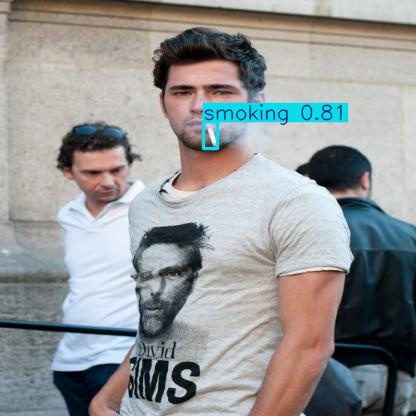

In [31]:
from IPython.display import Image

# Display the image
Image(filename='results0.jpg')

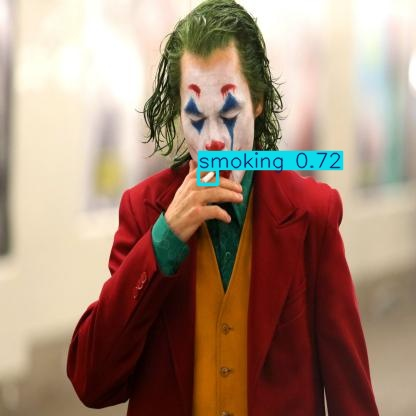

In [32]:
Image(filename='results1.jpg')

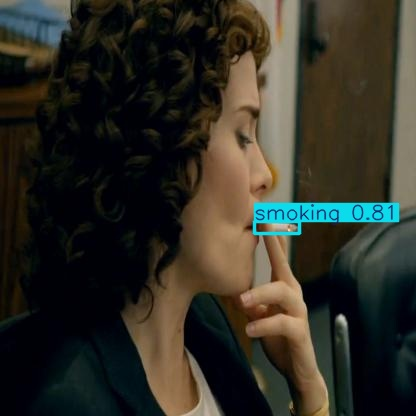

In [33]:
Image(filename='results2.jpg')

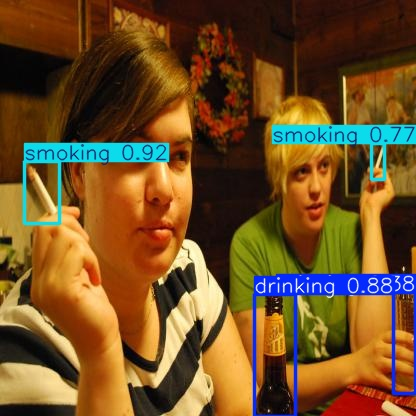

In [34]:
Image(filename='results3.jpg')

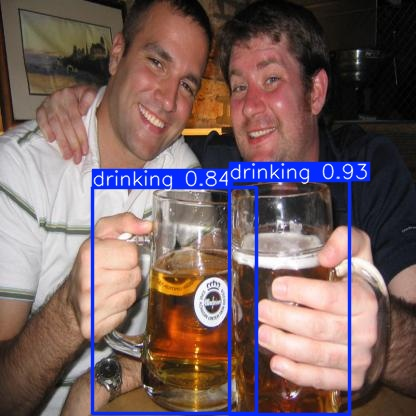

In [35]:
Image(filename='results4.jpg')